# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_table= pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")
# Display the data table for preview
merged_table

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
# Checking the number of mice.
number_mouse = len(mouse_metadata)  
number_mouse

249

In [61]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_table.loc[merged_table.duplicated(["Mouse ID", "Timepoint"], keep= False) == True].set_index("Mouse ID")
duplicates


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [85]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_mousedf = merged_table.drop_duplicates(["Mouse ID", "Timepoint"], keep= False, ignore_index=True)
new_mousedf

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1878,m601,25,33.118756,1,Capomulin,Male,22,17
1879,m601,30,31.758275,1,Capomulin,Male,22,17
1880,m601,35,30.834357,1,Capomulin,Male,22,17
1881,m601,40,31.378045,1,Capomulin,Male,22,17


In [96]:
# Checking the number of mice in the clean DataFrame.
number_mice= new_mousedf.reset_index()
#number_mice = len(new_mousedf["Mouse ID"].unique())
number_mice["Mouse ID"].value_counts()
mice_datapoint = number_mice["Mouse ID"].value_counts()
mice_datapoint


b128    10
p136    10
s337    10
q511    10
o926    10
        ..
f932     1
t573     1
b447     1
o848     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [98]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stats_table = new_mousedf.groupby(['Drug Regimen'])
# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean = stats_table['Tumor Volume (mm3)'].mean()
median = stats_table['Tumor Volume (mm3)'].median()
variance = stats_table['Tumor Volume (mm3)'].var()
std_variation = stats_table['Tumor Volume (mm3)'].std()
SEM = stats_table['Tumor Volume (mm3)'].sem()

stats_df = pd.DataFrame({
                        "Mean": mean,
                        "Median" : median,
                        "Variance" : variance,
                        "Standard Deviation" : std_variation,
                        "SEM" : SEM
                        })
stats_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [89]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
stats_agg = new_mousedf.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var","std","sem"])
stats_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

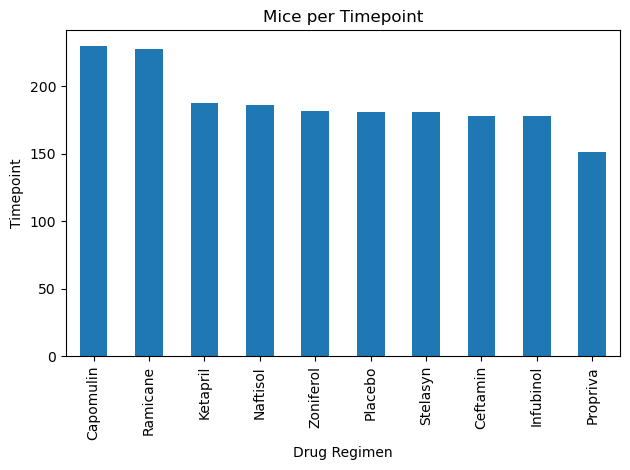

In [118]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_per_timepoint = new_mousedf.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False)
barplot = mice_per_timepoint.plot(kind='bar', title = "Mice per Timepoint")

# Set the xlabel and ylabel using class methods
barplot.set_xlabel("Drug Regimen")
barplot.set_ylabel("Timepoint")

# Resize plot to display labels
plt.tight_layout()

# Show plot
plt.show()

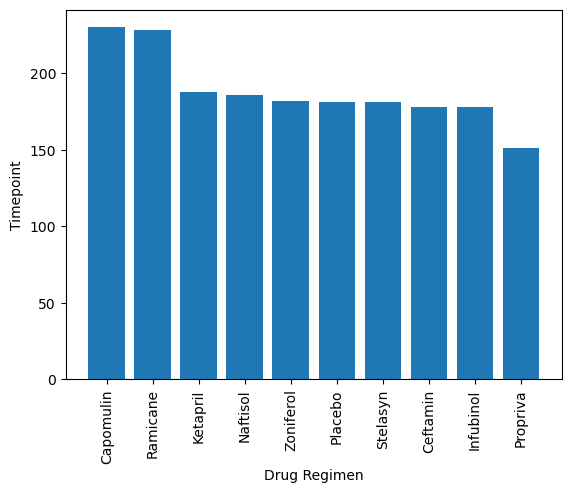

In [117]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_per_timepoint = mice_per_timepoint.sort_values(ascending=False) 
plt.bar(mice_per_timepoint.index, mice_per_timepoint.values) 
plt.ylabel('Timepoint', size=10) 
plt.xlabel('Drug Regimen') 
plt.xticks(rotation='vertical') 
plt.show()

<AxesSubplot:ylabel='Sex'>

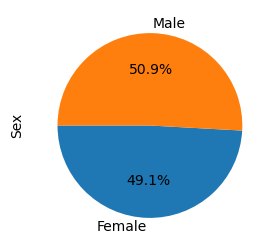

In [114]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = new_mousedf.groupby(["Sex"])["Sex"].count()


sex.plot.pie(autopct="%1.1f%%", startangle=180, figsize=(3,3))

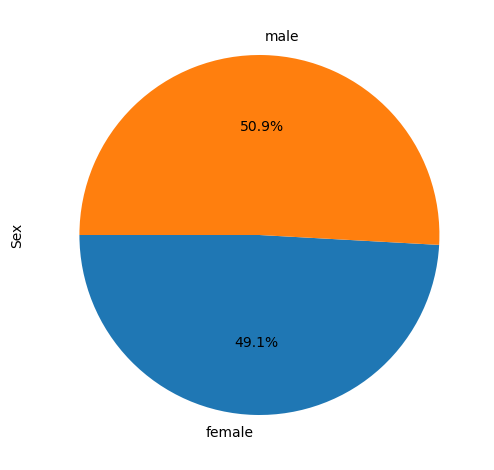

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels=('female', 'male'), startangle=180, autopct='%1.1f%%')
plt.ylabel('Sex') 
plt.tight_layout() 
plt.show()


## Quartiles, Outliers and Boxplots

In [146]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = new_mousedf.groupby(['Mouse ID'])['Timepoint'].max()
max_timepointdf = pd.DataFrame(max_timepoint) 

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_merged = pd.merge(merged_table, max_timepointdf, on=('Mouse ID', 'Timepoint'), how='right')
last_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [158]:
# Put treatments into a list for for loop (and later for plot labels)
#Create Dataframes for each of the 4 drugs listed.
Ramicane_df = new_mousedf.loc[new_mousedf['Drug Regimen'] == "Ramicane"]
Infubinol_df = new_mousedf.loc[new_mousedf['Drug Regimen'] == "Infubinol"]
Ceftamin_df = new_mousedf.loc[new_mousedf['Drug Regimen'] == "Ceftamin"]
Capomulin_df = new_mousedf.loc[new_mousedf['Drug Regimen'] == "Capomulin"]

#combine dataframes
treatments = [Capomulin_df, Ramicane_df, Infubinol_df, Ceftamin_df]
drugs_df = pd.concat(treatments)

# Start by getting the last (greatest) timepoint for each mouse
max_time = new_mousedf.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original dataframe 
final_merge = pd.merge(drugs_df,max_time, on="Mouse ID")
final_merge["MaxTime"] = final_merge["Timepoint_x"] == final_merge["Timepoint_y"]

#drop all rows that do not include the max time
final_merge.drop(final_merge.loc[final_merge['MaxTime']==False].index, inplace=True)

#create new df with Mouse ID, Drug Regimen, Time and Tumor Volume
time_tumor_df = final_merge[["Mouse ID","Drug Regimen","Timepoint_x","Tumor Volume (mm3)"]]
time_tumor_df 

,Mouse ID,Drug Regimen,Timepoint_x,Tumor Volume (mm3)
9,b128,Capomulin,45,38.982878
17,j246,Capomulin,35,38.753265
27,r554,Capomulin,45,32.377357
37,s185,Capomulin,45,23.343598
47,b742,Capomulin,45,38.939633
...,...,...,...,...
787,p438,Ceftamin,45,61.433892
793,b487,Ceftamin,25,56.057749
803,o287,Ceftamin,45,59.741901
812,q483,Ceftamin,40,64.192341


In [160]:
 # Calculate and print the interquartile range (IQR) for each regimen
 
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    volume = time_tumor_df.loc[time_tumor_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol.append(volume)
    #print(tumor_volume)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartile = volume.quantile([0.25,0.5,0.75])
    lower = quartile[0.25]
    upper = quartile[0.75]
    iqr = upper - lower
    #print(iqr)
   
    
    # Determine outliers using upper and lower bounds
    low_bound = lower - (1.5*iqr)
    up_bound = upper + (1.5*iqr)
    outliers = volume.loc[(volume > up_bound) | (volume < low_bound)]
    if len(outliers) > 0:
        print(f"The outliers for {drug} are {outliers}.")

The outliers for Infubinol are 459    36.321346
Name: Tumor Volume (mm3), dtype: float64.


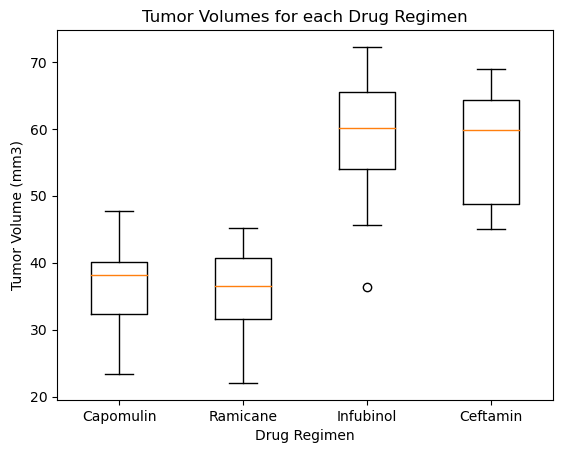

In [162]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, labels = treatment)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volumes for each Drug Regimen")
plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

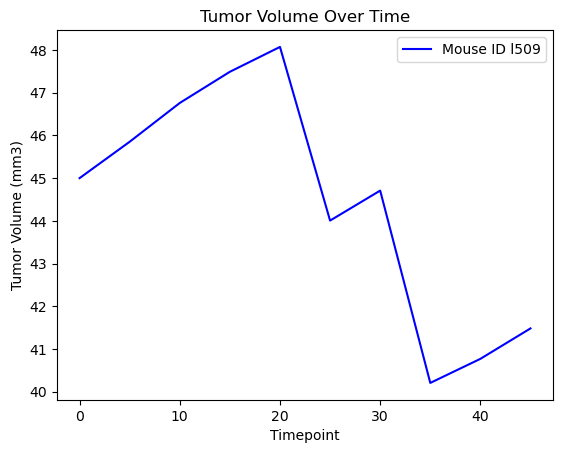

In [164]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse509 = Capomulin_df.loc[Capomulin_df["Mouse ID"]=="l509"]

#Create Line Plot
x = mouse509["Timepoint"]
y = mouse509["Tumor Volume (mm3)"]

plt.plot(x, y, color="blue",label="Mouse ID l509")
plt.legend(loc="best")
plt.title("Tumor Volume Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")


Text(0, 0.5, 'Tumor Volume (mm3)')

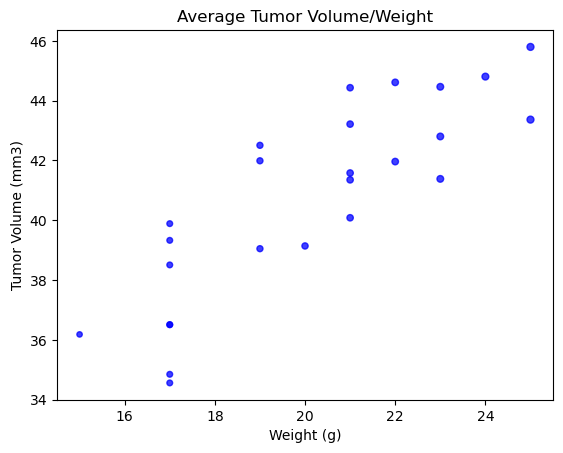

In [168]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_data = Capomulin_df.groupby("Mouse ID")
#variables to hold column data
mouseWg = mouse_data["Weight (g)"].mean()
mouseTV = mouse_data["Tumor Volume (mm3)"].mean()
#create new df
mouse_df = pd.DataFrame({"Weight (g)": mouseWg,
                       "Tumor Volume (mm3)": mouseTV})



# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#set x and y values
x_values = mouse_df["Weight (g)"]
y_values = mouse_df["Tumor Volume (mm3)"]

#create scatter plot
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="blue",
            s=x_values, alpha=0.75)
plt.title("Average Tumor Volume/Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

The correlation coefficient between mouse weight and tumor volume is 0.84


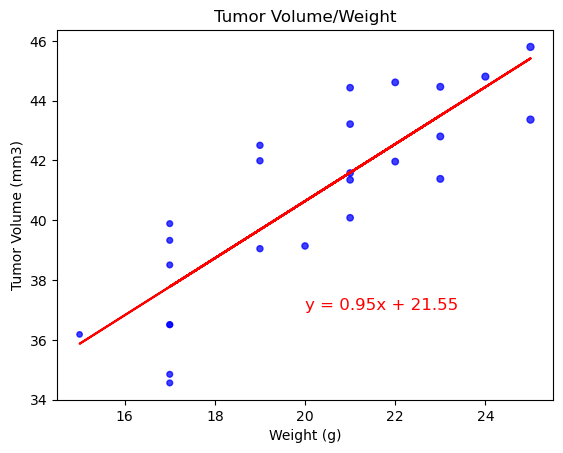

In [171]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = mouse_df["Weight (g)"]
y_values = mouse_df["Tumor Volume (mm3)"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="blue",
            s=x_values, alpha=0.75)
plt.title("Tumor Volume/Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

#plot line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=12,color="red")

#print correlation coefficient
print(f"The correlation coefficient between mouse weight and tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")
